# 46. Line Simplification

Line simplification is the process of taking a line/curve as represented by a list of points and reducing the number of points needed to accurately represent the given line. In these examples, we feed the algorithms a curve that is represented by 100 points, shown by the red line. The resulting line simplifications are shown in blue.

#### Imports and General Functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [99]:
def f(x):
    return np.sin(x) + x + x * np.sin(x)

def plot_function(show=True):
    plt.rcParams["figure.figsize"] = [14, 7]
    plt.rcParams["figure.autolayout"] = True

    x = np.linspace(-10, 10, 100)
    plt.plot(x, f(x), color='red', linewidth=0.5, label='Original')

    if show:
        plt.show()
    return x, f(x)

## Ramer-Douglas-Peucker

In [106]:
def perpendicular_distance(end1, end2, point):
    x1, y1 = end1
    x2, y2 = end2
    m = (y2 - y1) / (x2 - x1)
    A = m
    B = -1
    C = -m * x1 + y1
    return abs(A * point[0] + B * point[1] + C) / (A**2 + B**2)**0.5
    

def ramer_douglas_peucker(points, epsilon=0.05):
    # Find the point with the maximum distance
    dmax = 0
    index = 0
    end = len(points)-1
    for i in range(1, end):
        d = perpendicular_distance(points[0], points[end], points[i])
        if (d > dmax):
            index = i
            dmax = d
            
    results = [];

    # If max distance is greater than epsilon, recursively simplify
    if (dmax > epsilon):
        # Recursive call
        rec_results_left = ramer_douglas_peucker(points[0:index+1], epsilon)
        rec_results_right = ramer_douglas_peucker(points[index:end+1], epsilon)

        # Build the result list
        results.extend(rec_results_left[:-1])
        results.extend(rec_results_right)
    else:
        results = [points[0], points[-1]]
        
    # Return the result
    return results

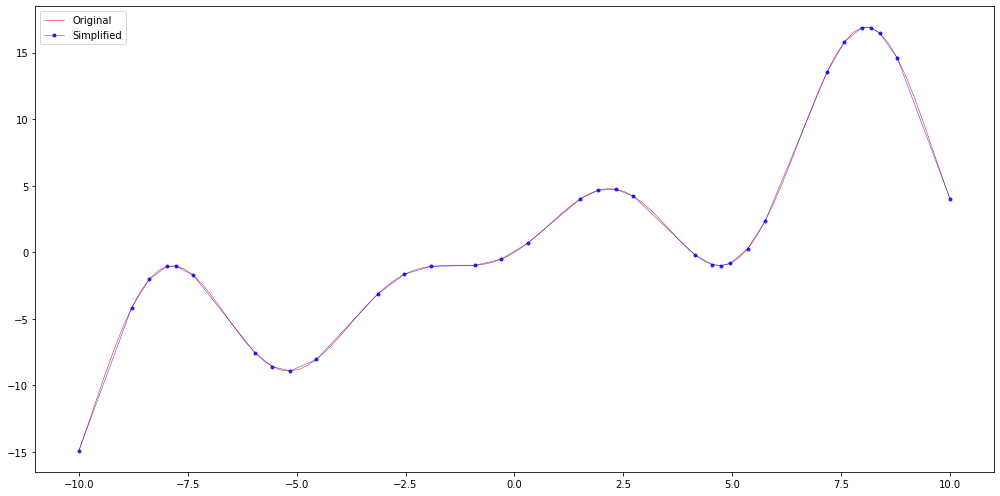

In [112]:
epsilon = 0.1
x, y = plot_function(False)
points = [(x[i], y[i]) for i in range(len(x))]
simplified = np.array(ramer_douglas_peucker(points, epsilon))
plt.plot(*simplified.T, color='blue', marker='o', markersize=3, linewidth=0.5, alpha=0.8, label='Simplified') #linewidth=0.5
plt.legend(loc='upper left')
plt.show()

## Visvalingam–Whyatt

In [141]:
def importance(end1, end2, point):
    return 1/2 * abs(end1[0] * point[1] + point[0] * end2[1] + end2[0] * end1[1] - end1[0] * end2[1] - point[0] * end1[1] - end2[0] * point[1])

def visvalingam_whyatt(points, epsilon=0.05, importances=None, index_removed=None):
    # Calculate importances and find the point with the least importance
    if importances is None:
        importances = []
        amin = np.inf
    index = 0
    if index_removed is None:
        for i in range(1, len(points) - 1):
            A_i = importance(points[i - 1], points[i + 1], points[i])
            importances.append(A_i)
            if (A_i < amin):
                amin = A_i
                index = i
    else:
        # Update only the importance of the points that were next to the one that was removed
        # index_removed is the index (in the points list) that was removed in the previous call
        if (index_removed > 1):
            importances[index_removed - 2] = importance(points[index_removed - 2], points[index_removed], points[index_removed - 1])
        if (index_removed < len(points) - 2):
            importances[index_removed - 1] = importance(points[index_removed - 1], points[index_removed + 1], points[index_removed])
        amin = min(importances)
        index = importances.index(amin) + 1
        
    if amin > epsilon:
        return points
    else:
        del points[index]
        del importances[index - 1]
        return visvalingam_whyatt(points, epsilon, importances, index)

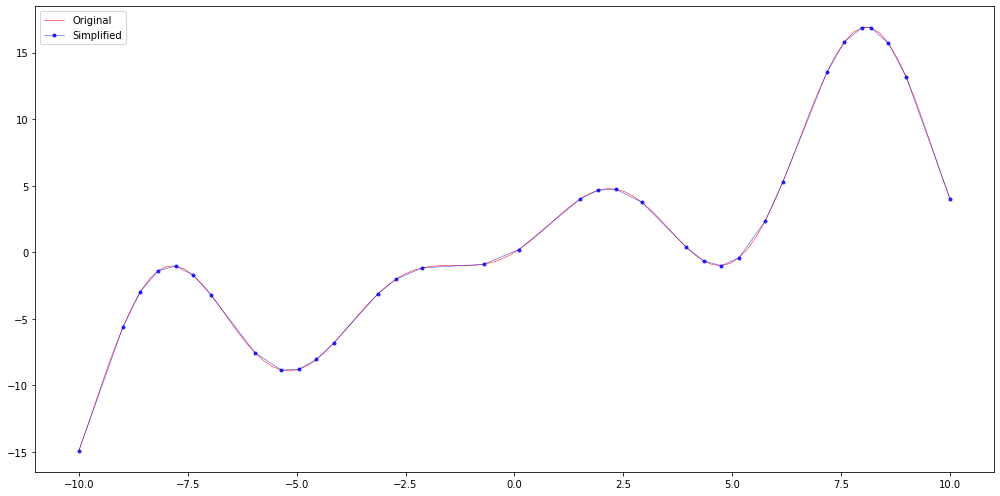

In [142]:
epsilon = 0.1
x, y = plot_function(False)
points = [(x[i], y[i]) for i in range(len(x))]
simplified = np.array(visvalingam_whyatt(points, epsilon))
plt.plot(*simplified.T, color='blue', marker='o', markersize=3, linewidth=0.5, alpha=0.8, label='Simplified') #linewidth=0.5
plt.legend(loc='upper left')
plt.show()

## Reumann–Witkam